# Исследование причин убыточности компании

**Описание задачи**\
В данной работе представлены исторические данные о пользователях (данные о посещении, покупки, рекламные расходы), привлечённых с 1 мая по 27 октября 2019 года. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Целью исследования является разобраться в причинах и помочь компании выйти в плюс.

**План работы**
1. Предобработка для подготовки данных к дальнейшему анализу
2. Анализ распределения пользователей в зависимости от страны, используемого устройства и рекламного канала
3. Анализ распределения трат по рекламным источникам
4. Анализ распределения расходов на рекламную кампанию по каждому источника по неделям и месяцамё
5. Оценка окупаемости рекламы
6. Подготовка общего вывода

**Описание данных**
1. visits_info_short.csv - лог сервера с информацией о посещениях сайта
2. orders_info_short.csv - информация о заказах
3. costs_info_short.csv - информация о расходах на рекламу

# Общий вывод

В данной работе были изучены исторические данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года

В процессе предобработки данных были переименованы названя столбцов, изменён тип данных в некоторых столбцах. Была выполнена проверка на наличие явных и неявных дубликатов.

В процессе исследовательского анализа данных была изучено распределение пользователей в зависимости от региона, используемого устройства и рекламного канала, с которого пришли пользователи. Было выяснено, что наибольшее количество пользователей (платящих и неплатящих) приходится на США. Среди устройств наибольшее количество пользователей использует iPhone. Что касается рекламного канала, максимальное количество пользователей пришло из органического трафика.

За исследуемый период на рекламу было потрачено 105497, из них наибольшее количество денег было потрачено на 2 рекламных канала (TipTop и FaceBoom). Лидером по стоимости привлечения клиента является TipTop.

Основной причиной убыточности рекламной кампании является тот факт, что на рекламные каналы FaceBoom и TipTop тратится наибольшее количество денег. При этом, эти каналы имеют ROI ниже порога окупаемости.

**Рекомендации:**
1. Необходимо перераспределить затраты на рекламные каналы. Обратить внимание на наиболее успешные рекламные каналы, такие как YRabbit, MediaTornado, lamdaMediaAds. Средства можно взять из убыточных кампаний, таких как TipTop, FaceBoom и AdNonSense
2. Наиболее прибыльными являются пользователи из Великобритании, пользуюхщиеся PC. Имеет смысл сфокусироваться на инвестировании в таких клиентов. 
3. Необходимо выяснить, какие методы были использованы для привлечения клиентов из канала YRabbit в июле, так как этот период характеризуется ростом ROI.
4. Для улучшения конверсии и удержания, необходимо более детально изучить проблему низкого удержания платящих клиентов, пришедших из рекламных каналов FaceBoom и AdNonSense

## Изучение общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [2]:
try:
    visits = pd.read_csv('https://code.s3.yandex.net//datasets/visits_info_short.csv') 
    orders = pd.read_csv('https://code.s3.yandex.net//datasets/orders_info_short.csv') 
    costs = pd.read_csv('https://code.s3.yandex.net//datasets/costs_info_short.csv') 
    
except:
    visits = pd.read_csv('/my_folder_with_files/visits_info_short.csv') 
    orders = pd.read_csv('/my_folder_with_files/orders_info_short.csv') 
    costs = pd.read_csv('/my_folder_with_files/costs_info_short.csv') 

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Вывод: 
1. Пропущенные значения в датасетах не обнаружены.
2. В столбцах, обозначающих дату и время, необходимо поменять тип данных с object на datetime.
3. Для дальнейшего анализа названия столбцов необходимо привести к нижнему регистру.

## Предобработка данных

### Переименование столбцов

In [9]:
#приведение названий столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

#переименование столбцов
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

### Устранение дубликатов

In [10]:
#поиск уникальных значений в столбцах
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [11]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [12]:
visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

In [13]:
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

Вывод: неявные дубликаты не обнаружены

In [14]:
#поиск явных дубликатов
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

Вывод: явные дубликаты не обнаружены

### Изменение типа данных

In [17]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

## Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

### Функция для создания пользовательских профилей

In [18]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта  LTV и ROI

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [22]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Определение минимальной и максимальной дат привлечения

In [26]:
#создание профилей пользователей
get_profiles(visits, orders, costs)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-28 08:33:02,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-21 00:35:17,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-23 02:57:06,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-28 21:28:09,False,0.205714


In [27]:
#определение минимальной даты привлечения
print(f"Минимальная дата привлечения пользователей {get_profiles(visits, orders, costs)['first_ts'].min()}")

#определение максимальной даты привлечения
print(f"Максимальная дата привлечения пользователей {get_profiles(visits, orders, costs)['first_ts'].max()}")

Минимальная дата привлечения пользователей 2019-05-01 00:00:41
Максимальная дата привлечения пользователей 2019-10-27 23:59:04


### Анализ пользователей по странам

In [28]:
#написание функции для создания сводной таблицы
def get_table(parameter):
    table = get_profiles(visits, orders, costs).groupby(parameter).agg({'user_id':'count', 'payer':'sum'}) \
                     .sort_values('user_id', ascending=False).reset_index()
    table['conversion'] = round((table['payer'] / table['user_id']), 3)
    return table

In [29]:
#создание сводной таблицы, показывающей количество пользователей и долю платящих пользователей из каждой страны
get_table('region')

,region,user_id,payer,conversion
0,United States,100002,6902,0.069
1,UK,17575,700,0.040
2,France,17450,663,0.038
3,Germany,14981,616,0.041


Вывод: в данном датасете представлены пользователи из 4 стран (США, Великобритания, Франция, Германия). Наибольшее количество пользователей приходится на США (100002). 

### Анализ пользователей по устройствам

In [30]:
#создание сводной таблицы, показывающей количество пользователей и долю платящих пользователей в зависимости от устройства
get_table('device')

,device,user_id,payer,conversion
0,iPhone,54479,3382,0.062
1,Android,35032,2050,0.059
2,PC,30455,1537,0.050
3,Mac,30042,1912,0.064


Вывод: в данном датасете представлены пользователи, пользующиеся iPhone, Android, PC, Mac. Наибольшее количество платящих пользователей использует iPhone.

### Анализ пользователей по рекламным источникам

In [31]:
#создание сводной таблицы, показывающей количество пользователей и долю платящих пользователей в зависимости от рекламного канала 
users_by_channel = get_table('channel')
users_by_channel

,channel,user_id,payer,conversion
0,organic,56439,1160,0.021
1,FaceBoom,29144,3557,0.122
2,TipTop,19561,1878,0.096
3,OppleCreativeMedia,8605,233,0.027
4,LeapBob,8553,262,0.031
5,WahooNetBanner,8553,453,0.053
6,RocketSuperAds,4448,352,0.079
7,MediaTornado,4364,156,0.036
8,YRabbit,4312,165,0.038
9,AdNonSense,3880,440,0.113


Вывод: наибольшее количество пользователей пришло из органического трафика. Максимальное количество платящих пользователей пришло из рекламного источника FaceBoom. 

## Маркетинг

### Расчёт общей суммы расходов

In [32]:
#расчёт общей суммы расходов
print(f"Общая сумма расходов на маркетинг составляет - {round(costs['costs'].sum())}")

Общая сумма расходов на маркетинг составляет - 105497


### Анализ распределения трат по рекламным источникам

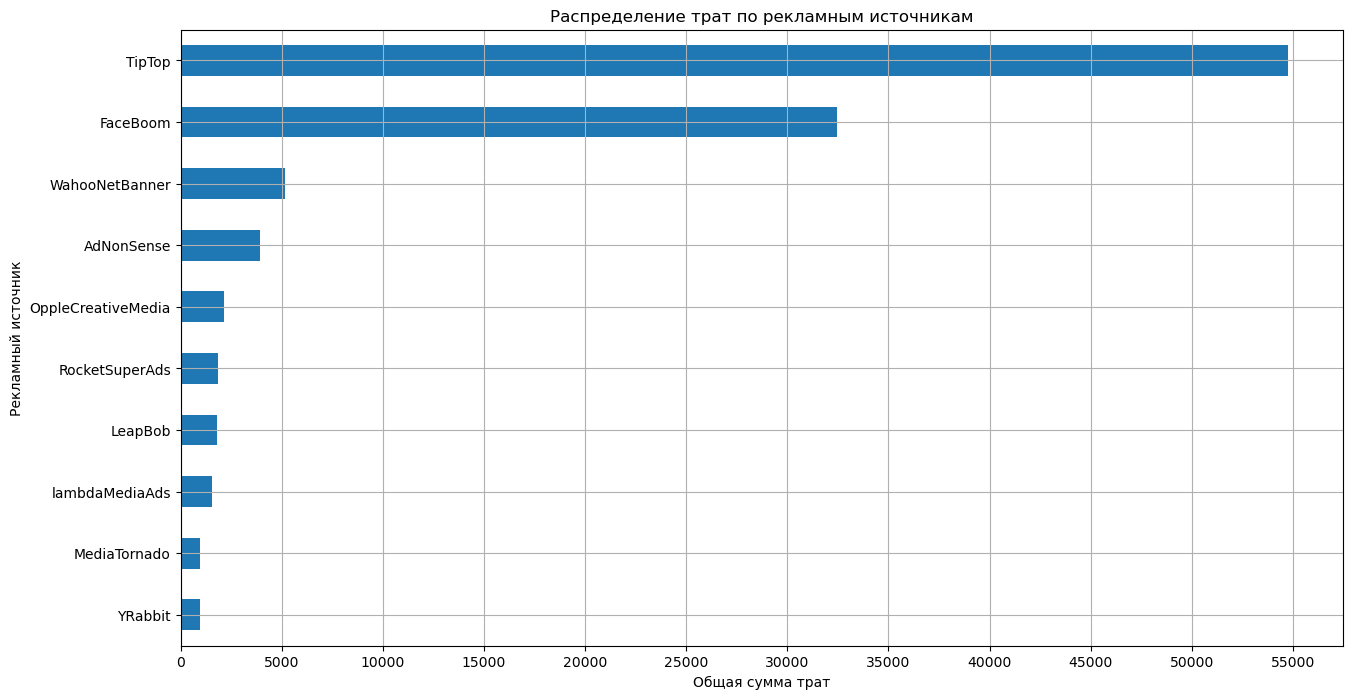

In [33]:
#построение графика распределения трат по рекламным источникам
costs.groupby('channel').agg({'costs':'sum'}).sort_values('costs').plot(kind='barh', figsize=(15,8), grid=True, legend=False);
plt.title('Распределение трат по рекламным источникам') 
plt.xlabel('Общая сумма трат')
plt.xticks(np.arange(0, 60000, 5000))
plt.ylabel('Рекламный источник')
plt.show()

### Анализ динамики расходов по времени

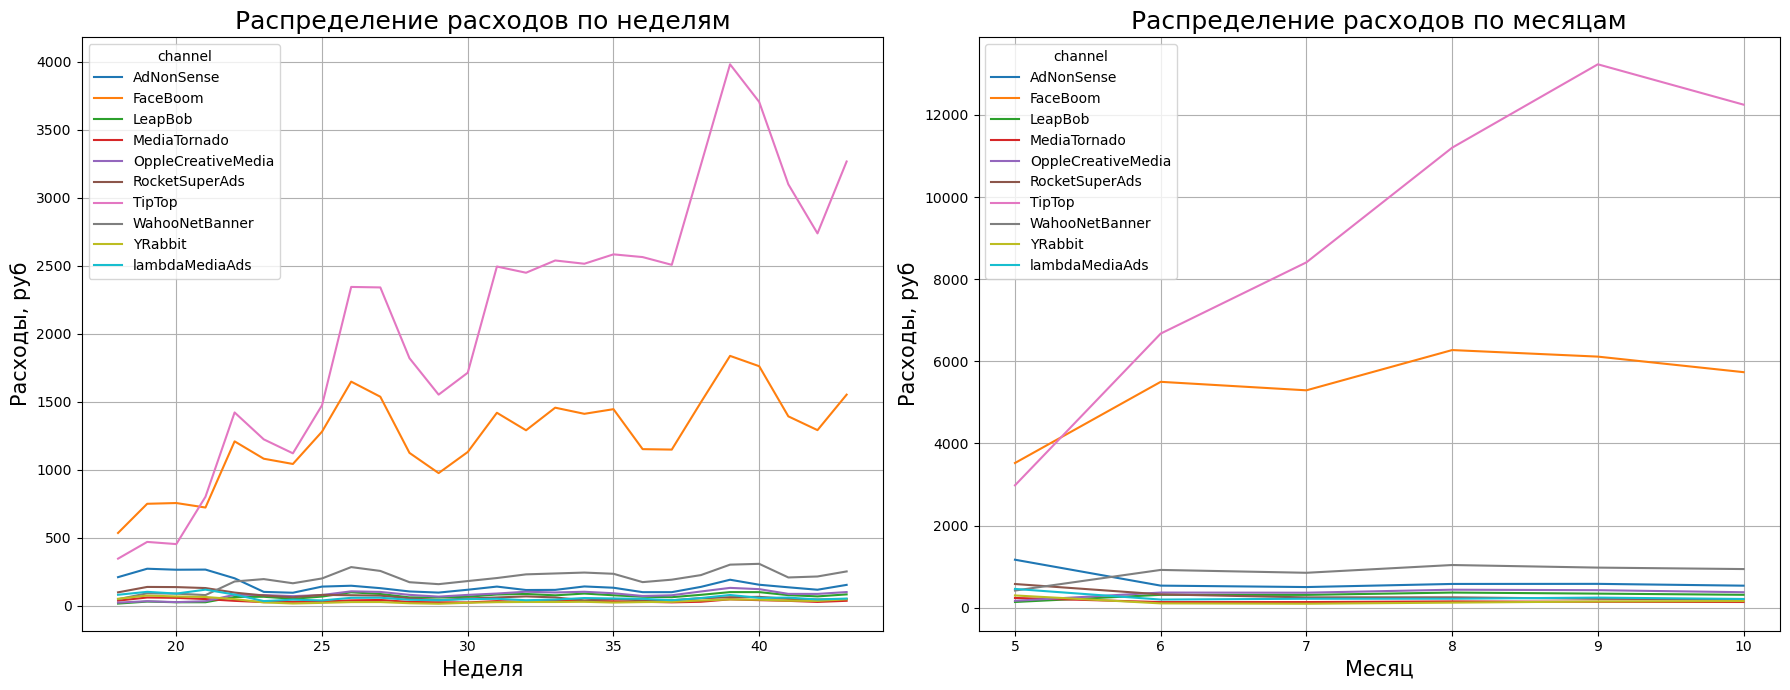

In [34]:
#создание новых столбцов с указанием номера недели и месяца
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

#построение графиков распределения расходов на рекламную кампанию по каждому источника по неделям и месяцам
ax1 = plt.subplot(1,2,1)
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(12, 7), ax=ax1);
plt.ylabel('Расходы, руб', fontsize=15)
plt.xlabel('Неделя', fontsize=15)
plt.title("Распределение расходов по неделям", fontsize=18);

ax2 = plt.subplot(1,2,2)
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(18, 7), ax=ax2);
plt.ylabel('Расходы, руб', fontsize=15)
plt.xlabel('Месяц', fontsize=15)
plt.title("Распределение расходов по месяцам", fontsize=18);

plt.tight_layout()
plt.show()


### Анализ CAC из каждого источника

In [35]:
#расчёт общей стоимости затрат на рекламную кампанию для каждого источника
costs_by_channel = costs.groupby('channel').agg({'costs':'sum'}).reset_index()

#создание общей таблицы для расчёта CAC
table_combined = users_by_channel.merge(costs_by_channel, on='channel', how='right')
table_combined['cac'] = round(table_combined['costs'] / table_combined['user_id'], 3)
table_combined = table_combined.sort_values('cac')
table_combined

,channel,user_id,payer,conversion,costs,cac
2,LeapBob,8553,262,0.031,1797.60,0.210
3,MediaTornado,4364,156,0.036,954.48,0.219
8,YRabbit,4312,165,0.038,944.22,0.219
4,OppleCreativeMedia,8605,233,0.027,2151.25,0.250
5,RocketSuperAds,4448,352,0.079,1833.00,0.412
7,WahooNetBanner,8553,453,0.053,5151.00,0.602
9,lambdaMediaAds,2149,225,0.105,1557.60,0.725
0,AdNonSense,3880,440,0.113,3911.25,1.008
1,FaceBoom,29144,3557,0.122,32445.60,1.113
6,TipTop,19561,1878,0.096,54751.30,2.799


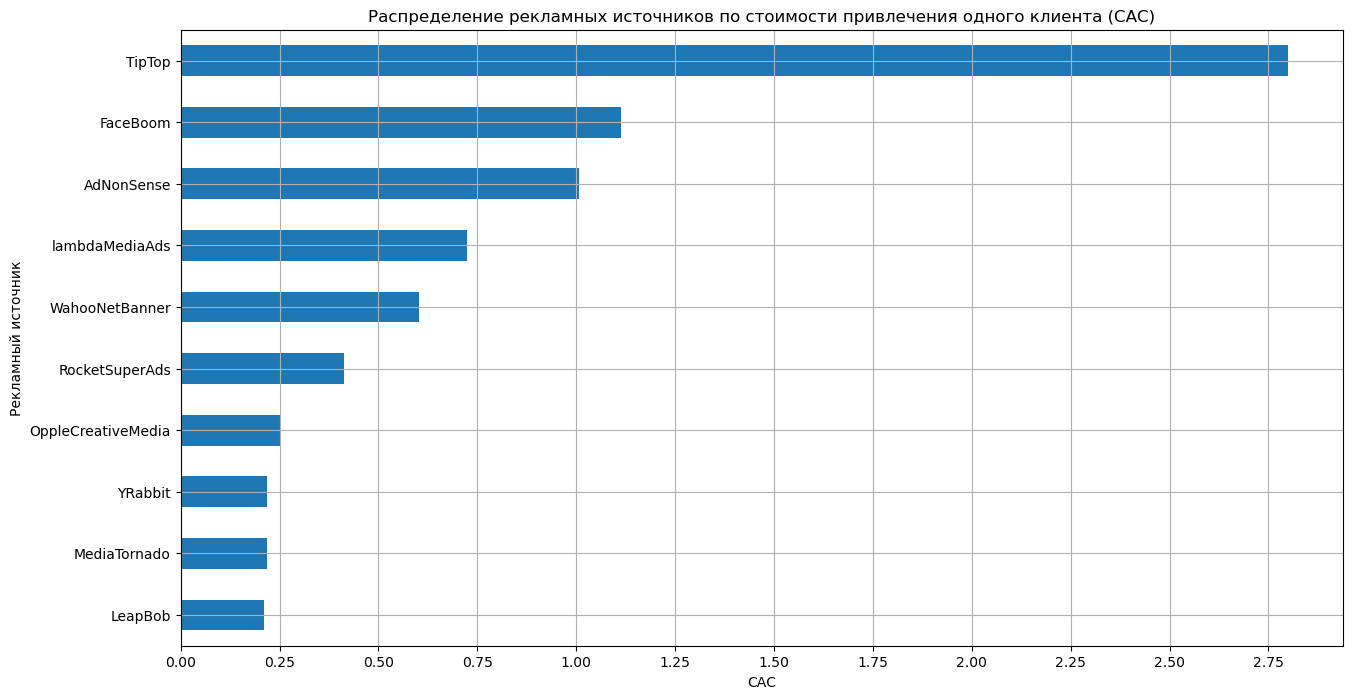

In [36]:
#построение столбчатой диаграммы
table_combined.plot(x='channel', y='cac', kind='barh', legend=False, figsize=(15,8), grid=True);
plt.title('Распределение рекламных источников по стоимости привлечения одного клиента (САС)') 
plt.xlabel('САС')
plt.ylabel('Рекламный источник')
plt.xticks(np.arange(0,3, 0.25));

Вывод:
1. За исследуемый период на рекламную кампанию было потрачено ~105 500
2. Больше половины трат пришлось на рекламный источник TipTop. На втором месте по величине трат находится FaceBoom. Траты на остальные рекламные источники примерно одинаковы и составляют менее 50 000.
3. Наибольшее количество расходов приходится на 2 рекламных источника - TipTop и FaceBoom. Данные расходы увеличиваются до 9 месяца, затем наблюдается неболшое снижение. Расходы на остальные рекламные источники примерно одинаковые и стабильны на протяжении исследуемого периода.
4. Наиболее затратным с точки зрения стоимости привлечения одного клиента является рекламный источник TipTop. CAC для этого источника составляет 2.799/пользователь.

## Оценка окупаемости рекламы

### Анализ LTV, ROI

In [37]:
profiles = get_profiles(visits, orders, costs)

In [38]:
#удаление из базы данных пользователей, пришеших из органического трафика
profiles = profiles.query('channel != "organic"')

In [39]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000


In [40]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

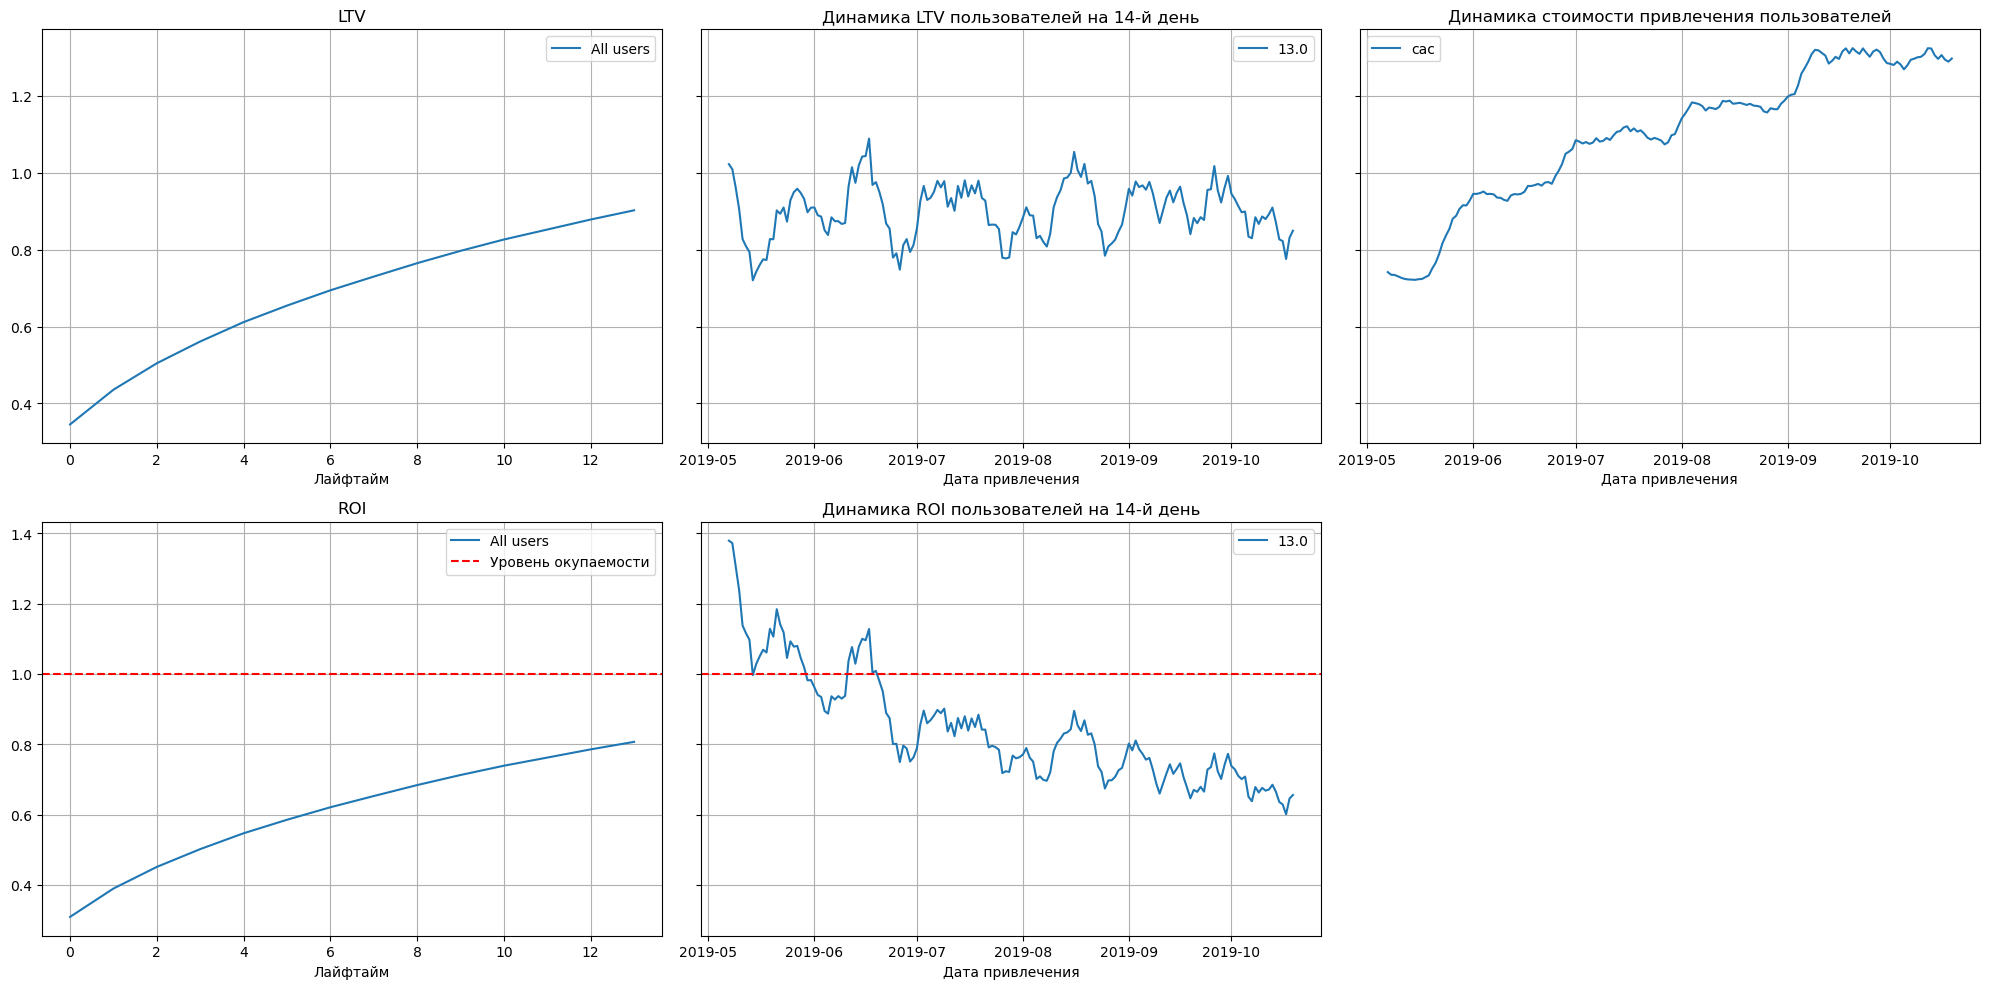

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Вывод: 
1. Реклама не окупается. ROI на 14ый день — чуть выше 80%. 
2. CAC увеличивается на протяжении исследуемого периода, что говорит об увеличении рекламного бюджета.
3. LTV показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. Реклама окупалась только для пользователей, привлечённых до июня 2019 года.

### Анализ конверсии и удержания с разбивкой по рекламным каналам

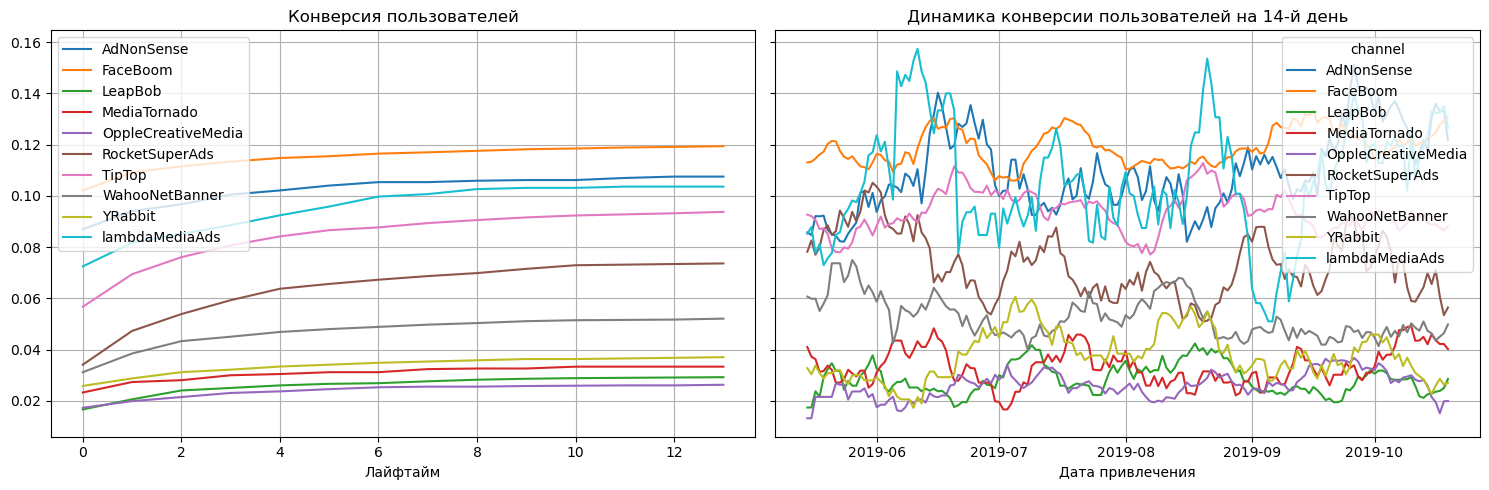

In [42]:
#строим конверсию с разбивкой по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=15) 

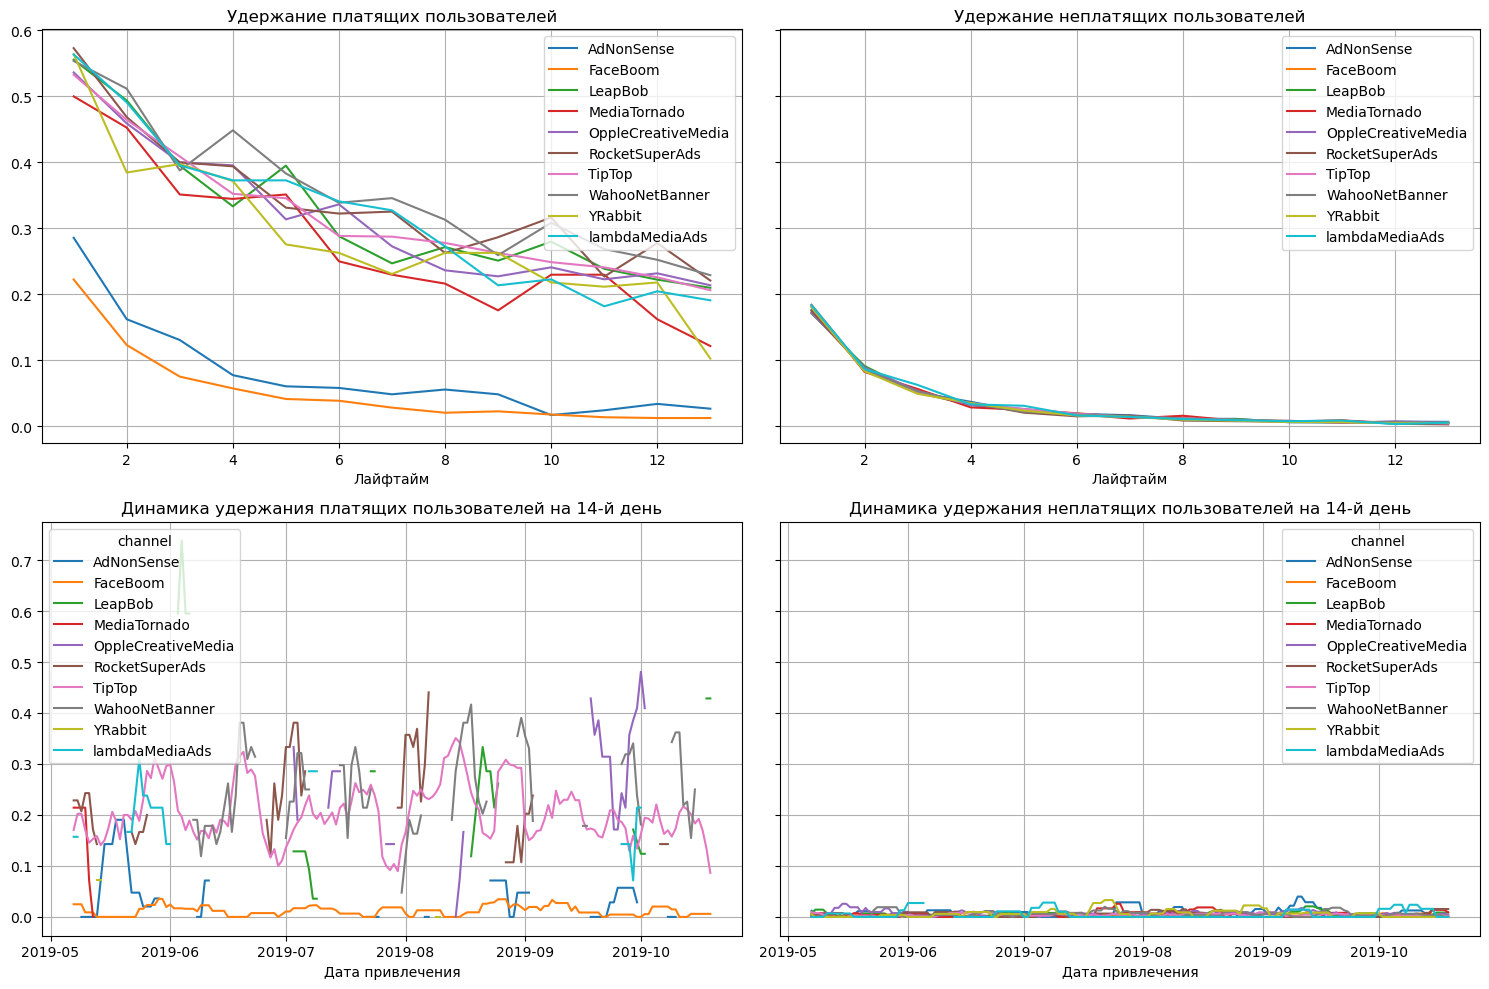

In [43]:
#строим удержание с разбивкой по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'], ignore_horizon=False,)

plot_retention(retention_grouped, retention_history, horizon_days, window=7)

Вывод:
1. Наибольшую конверсию показывают пользователи, привлечённые из рекламных каналов FaceBoom и AdNonSense, при этом удержание платящих пользователей из этих каналов значительно ниже остальных каналов. 
2. Удержание неплатящих пользователей не отличается в зависимости от рекламного канала.

### Анализ конверсии и удержания с разбивкой по устройствам

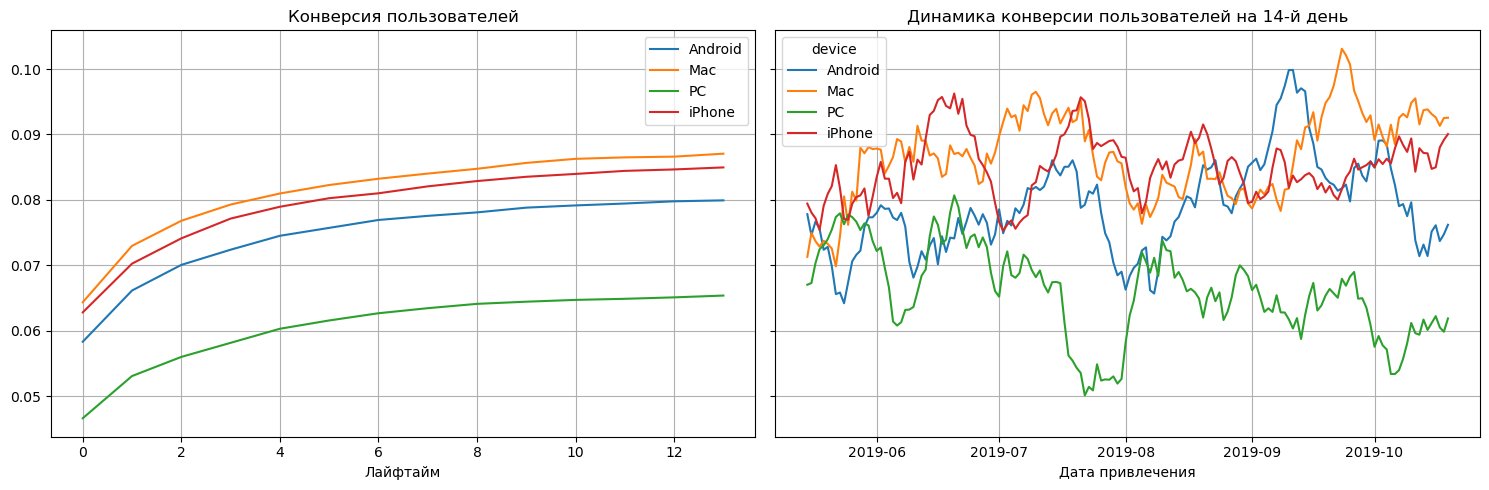

In [44]:
#строим конверсию с разбивкой по устройству
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=15) 

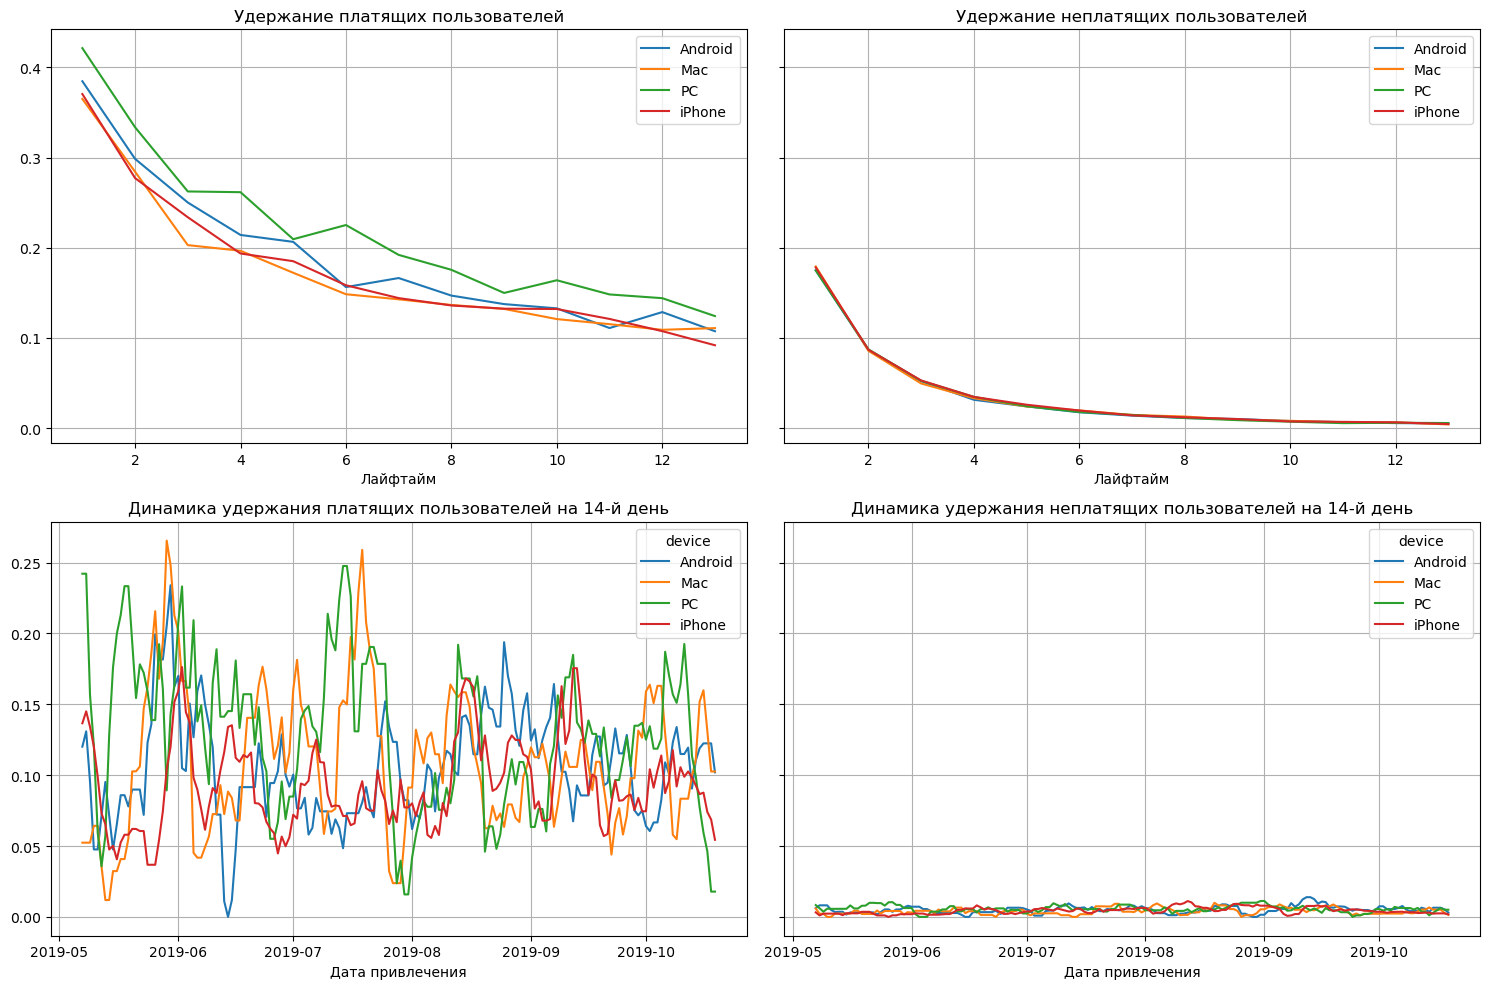

In [45]:
#строим удержание с разбивкой по устройству
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False,)

plot_retention(retention_grouped, retention_history, horizon_days, window=7)

Вывод: 
1. Наименьшую конверсию показывают пользователи, использующие PC. Конверсия пользователей, пользующихся остальными устройствами, примерно одинакова с небольшим преимуществом пользователей на Mac.
2. Не наблюдается существенного различия в удержании платящих пользователей.
4. Удержание неплатящих пользователей не отличается в зависимости от используемого девайса.

### Анализ конверсии и удержания с разбивкой по региону

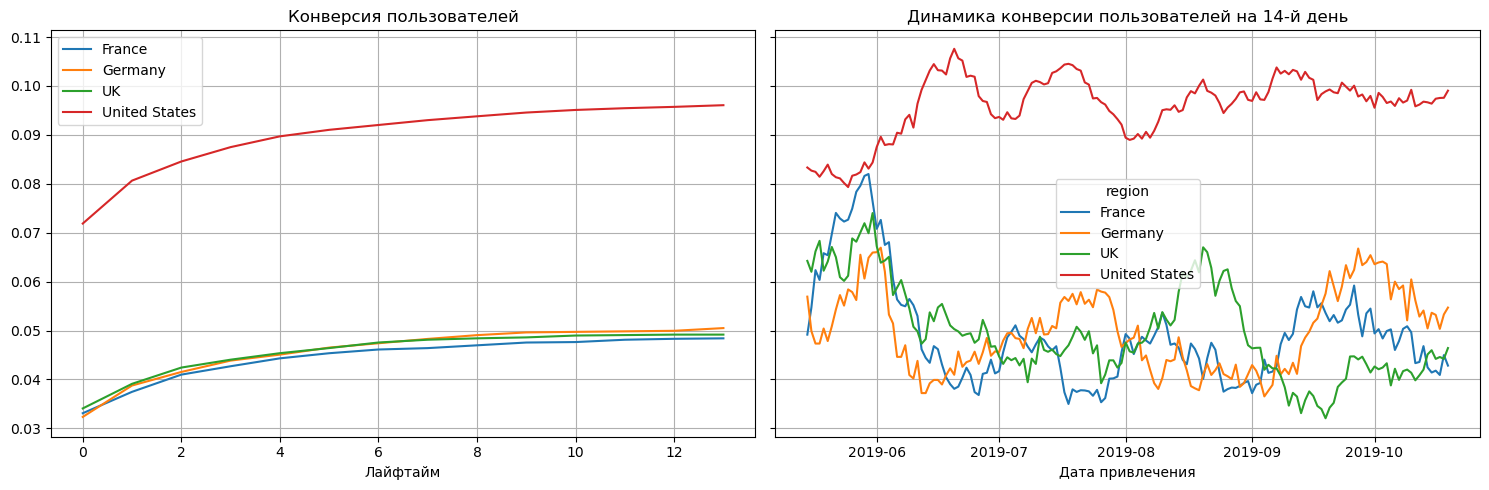

In [46]:
#строим конверсию с разбивкой по региону
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=15) 

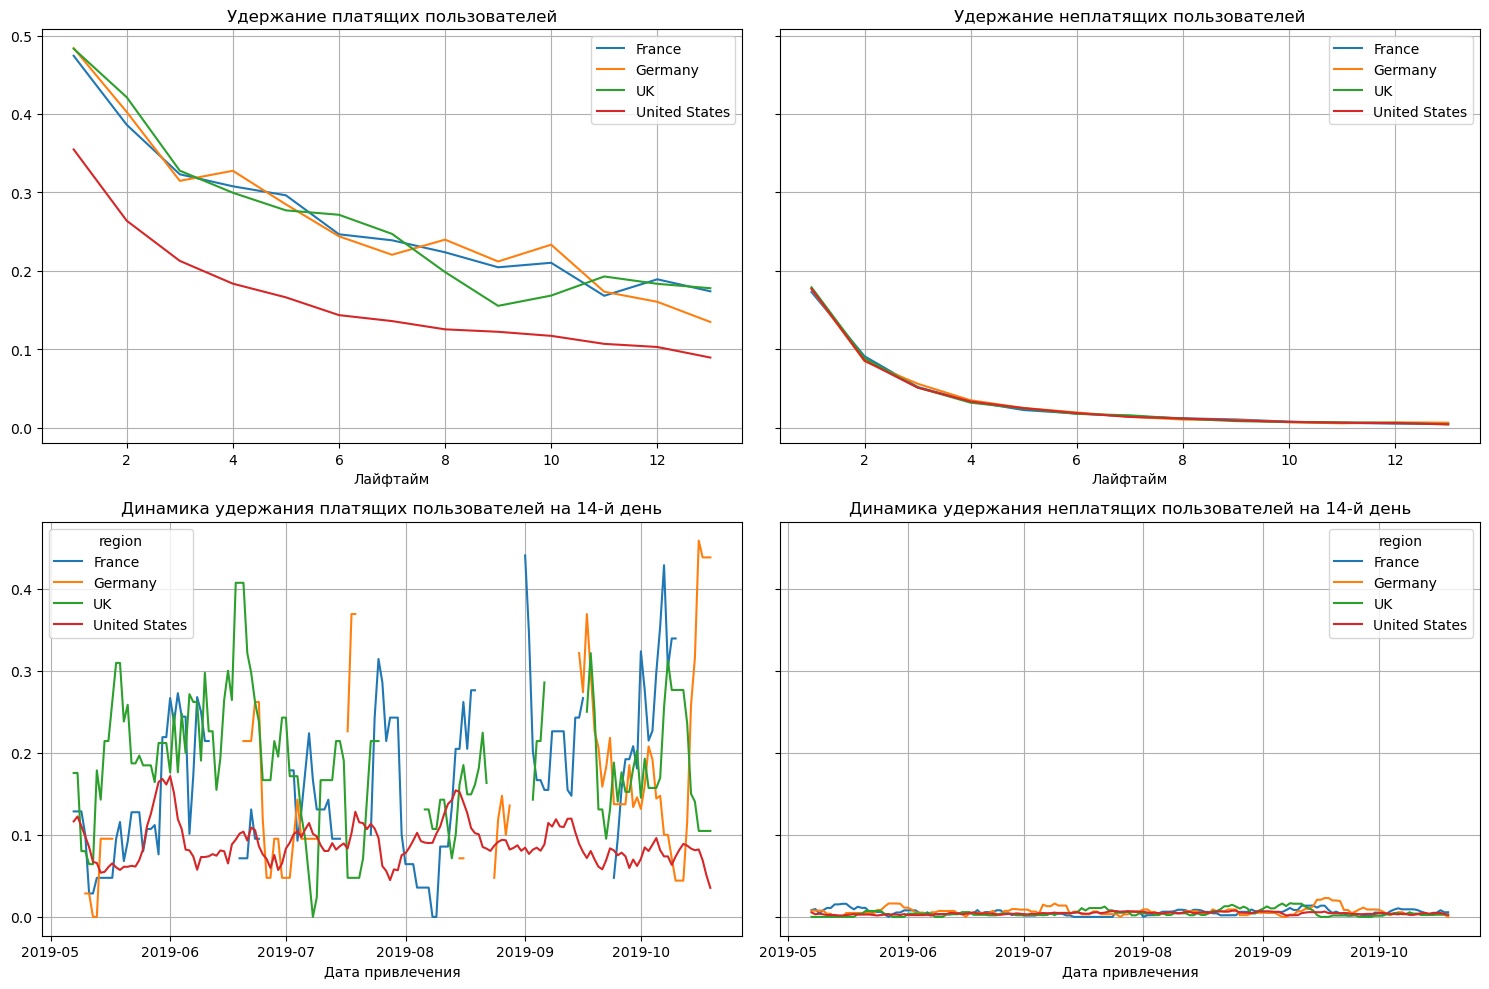

In [47]:
#строим удержание с разбивкой по региону
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'], ignore_horizon=False,)

plot_retention(retention_grouped, retention_history, horizon_days, window=7)

Вывод:
1. Наибольшую конверсию показывают пользователи из США. Начиная с июня, конверсия на 14ый день для таких пользователей стабильна на протяжении исследуемого периода. Конверсия пользователей из остальных стран находится примерно на одинаковом уровне. Начиная с июня, отмечается провал конверсии пользователей на 14ый день. Возможно, это связано с внедрением некачественного обновления.
2. Удержание платящих пользователей из США ниже, чем удержание пользователей из других регионов. 
3. Удержание неплатящих пользователей не отличается в зависимости от региона.

### Оценка окупаемости рекламы с разбивкой по устройствам

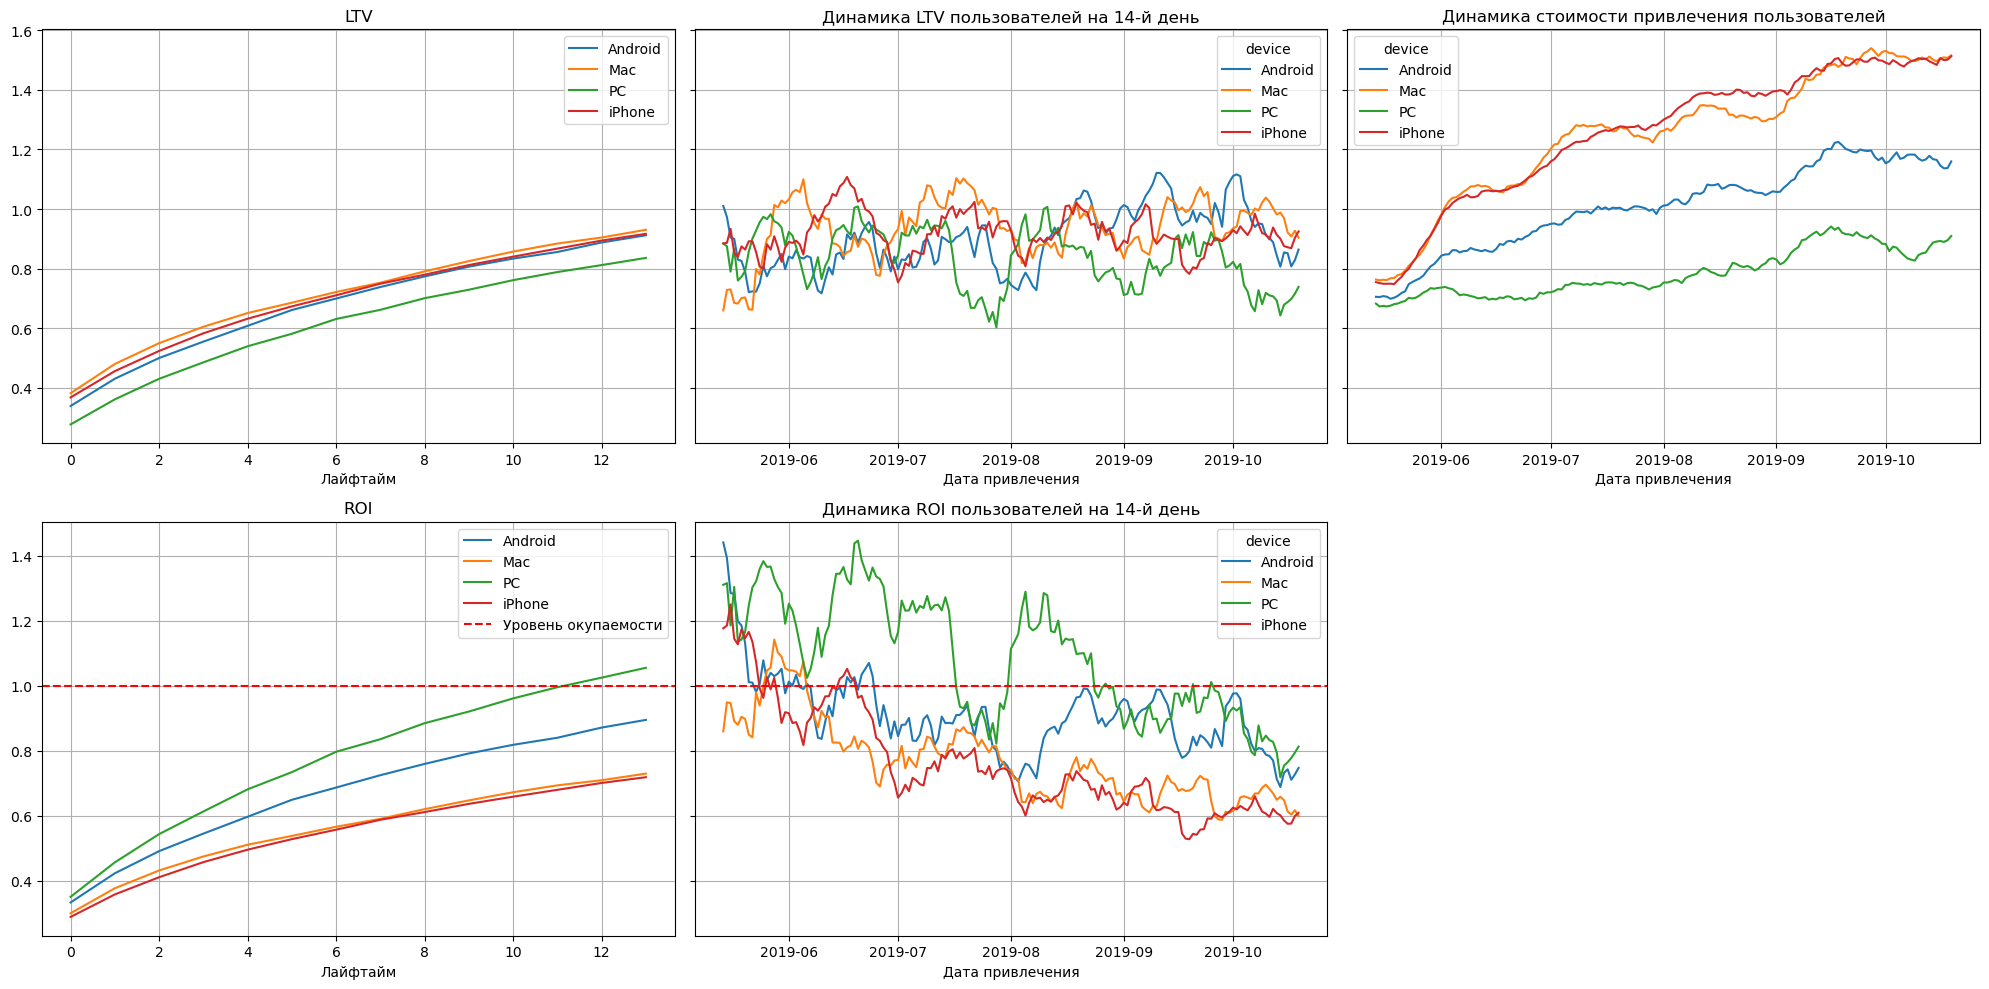

In [48]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вывод: 
1. Реклама окупается только для пользователей, пользующихся персональными компьютерами.
2. LTV пользователей на 14ый день относительно стабилен. 
3. Стоимость привлечения пользователей растёт на протяжении исследуемого периода.
5. ROI пользователей на 14ый день снижается для всех устройств. Учитывая что LTV стабилен, скорее всего, снижение ROI связано с увеличением расходов на рекламу.
2. Среди пользователей PC наблюдается сезонность. В первой половине июня и второй половине июля отмечаются провалы ROI.

### Оценка окупаемости рекламы с разбивкой по странам

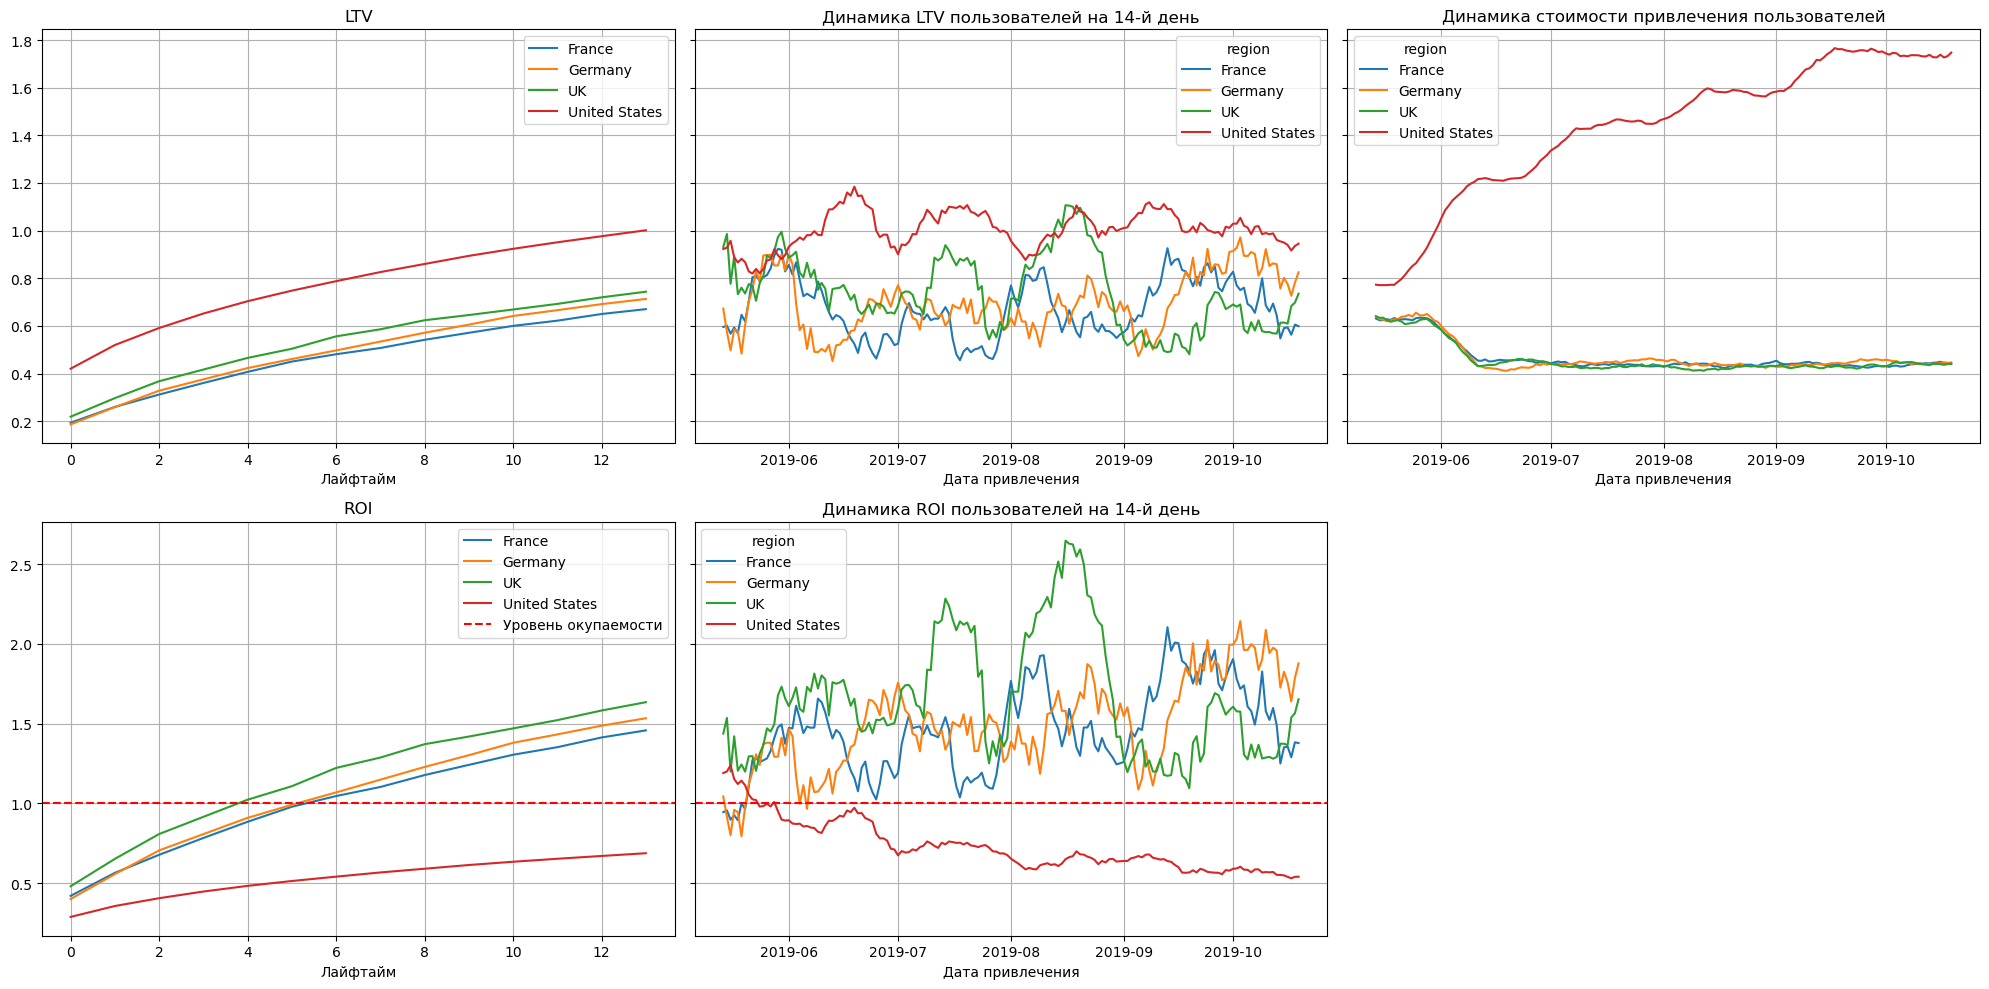

In [49]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вывод:
1. Рекламные кампании окупаются во всех странах, кроме США.
2. Наибольшее LTV показывают пользователи из США.
3. В Великобритании отмечаются 2 роста LTV пользователей, привлечённых в середине июля и августа.  
4. Стоимость привлечения пользователей из США намного больше САС пользователей из других стран.
5. Реклама на пользователей из США окупалась только в середине мая. Затем после увеличения рекламных расходов, ROI стала ниже порога окупаемости.

### Оценка окупаемости рекламы с разбивкой по рекламным каналам

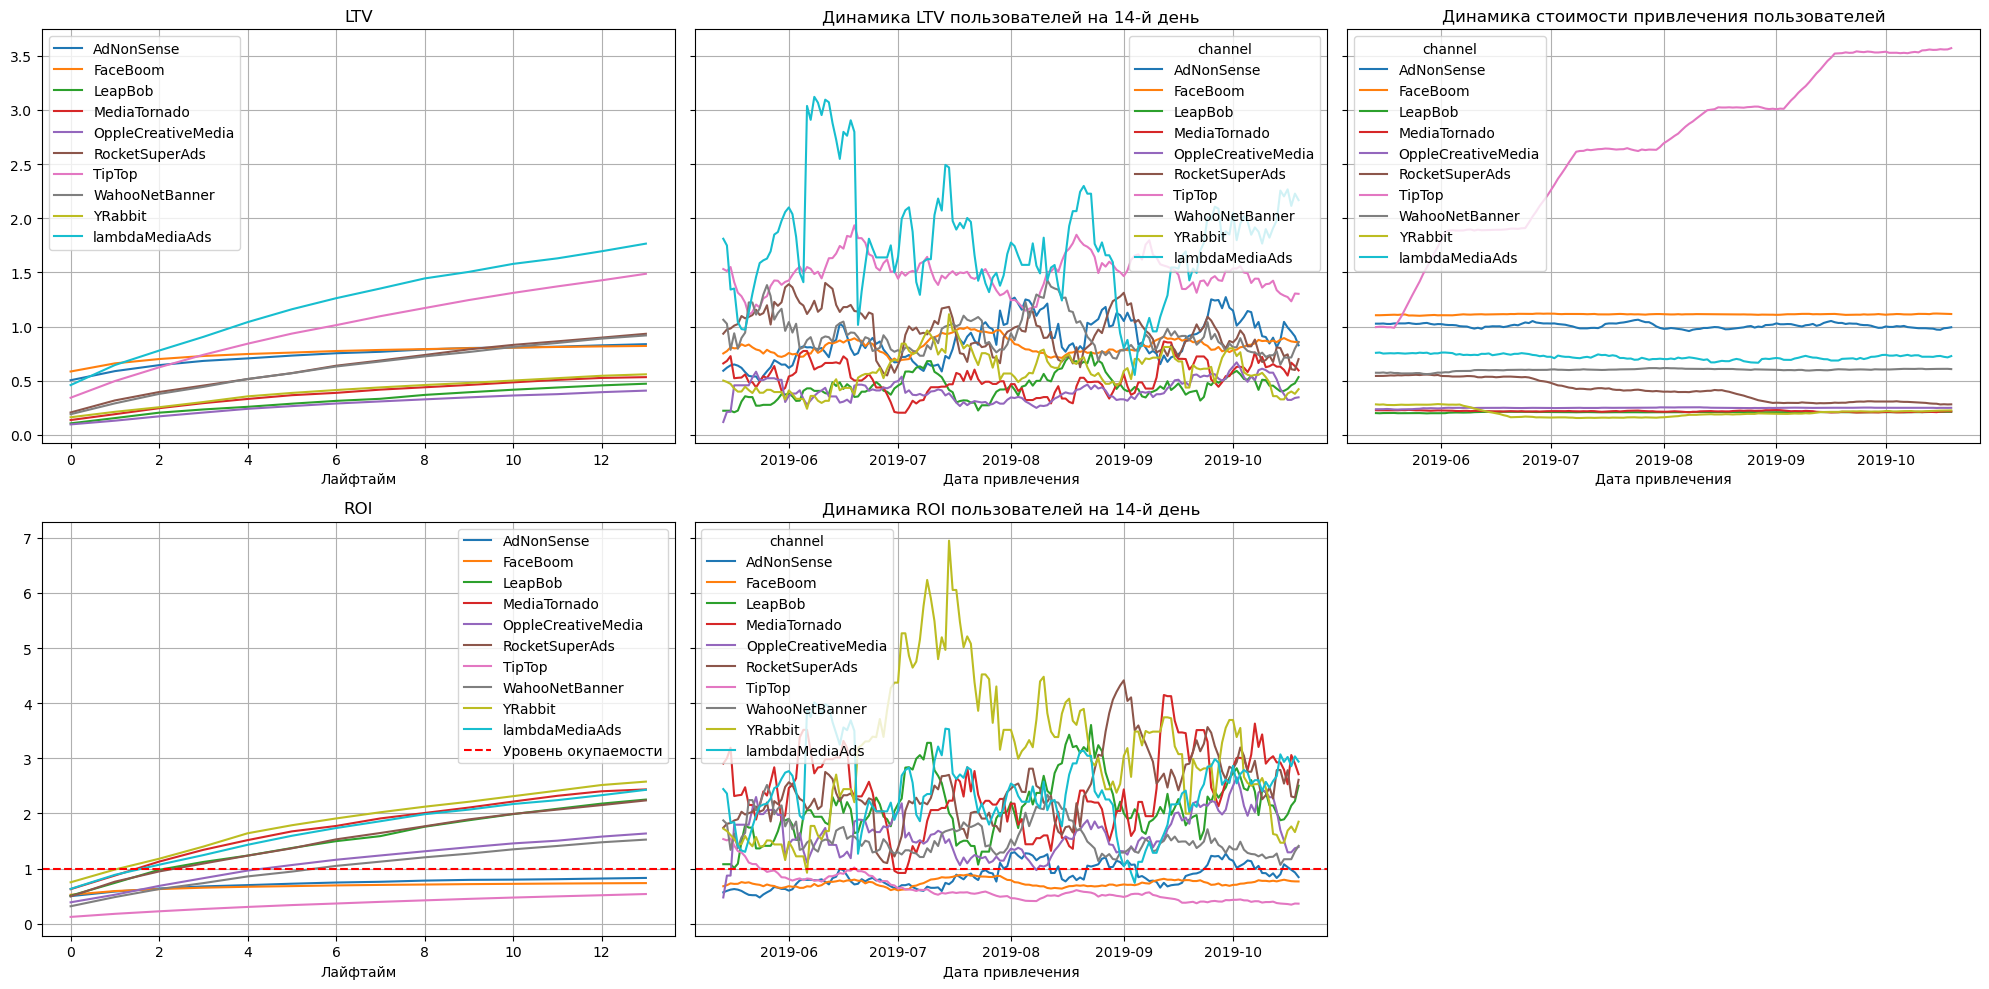

In [50]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Вывод: 
1. Использование большинства рекламных канала окупаются, за исключением TipTop, FaceBoom и AdNonSense. Лидерами по окупаемости являются каналы YRabbit, MediaTornado и lambdaMediaAds. Среди этих 3х каналов, наибольшие LTV и динамику LTV на 14ый день отмечаются у пользователей, привлечённых из канала lambdaMediaAds.
2. Стоимость привлечения клиентов из рекламного канала TipTop в несколько раз превышает САС остальных каналов.
3. Отмечается рост ROI пользователей, которые были привлечены из рекламного источника YRabbit в период с июля по август.
4. Наибольший LTV имеют каналы lambdaMediaAds и TipTop.

### Анализ LTV, ROI в разрезе США-Европа 

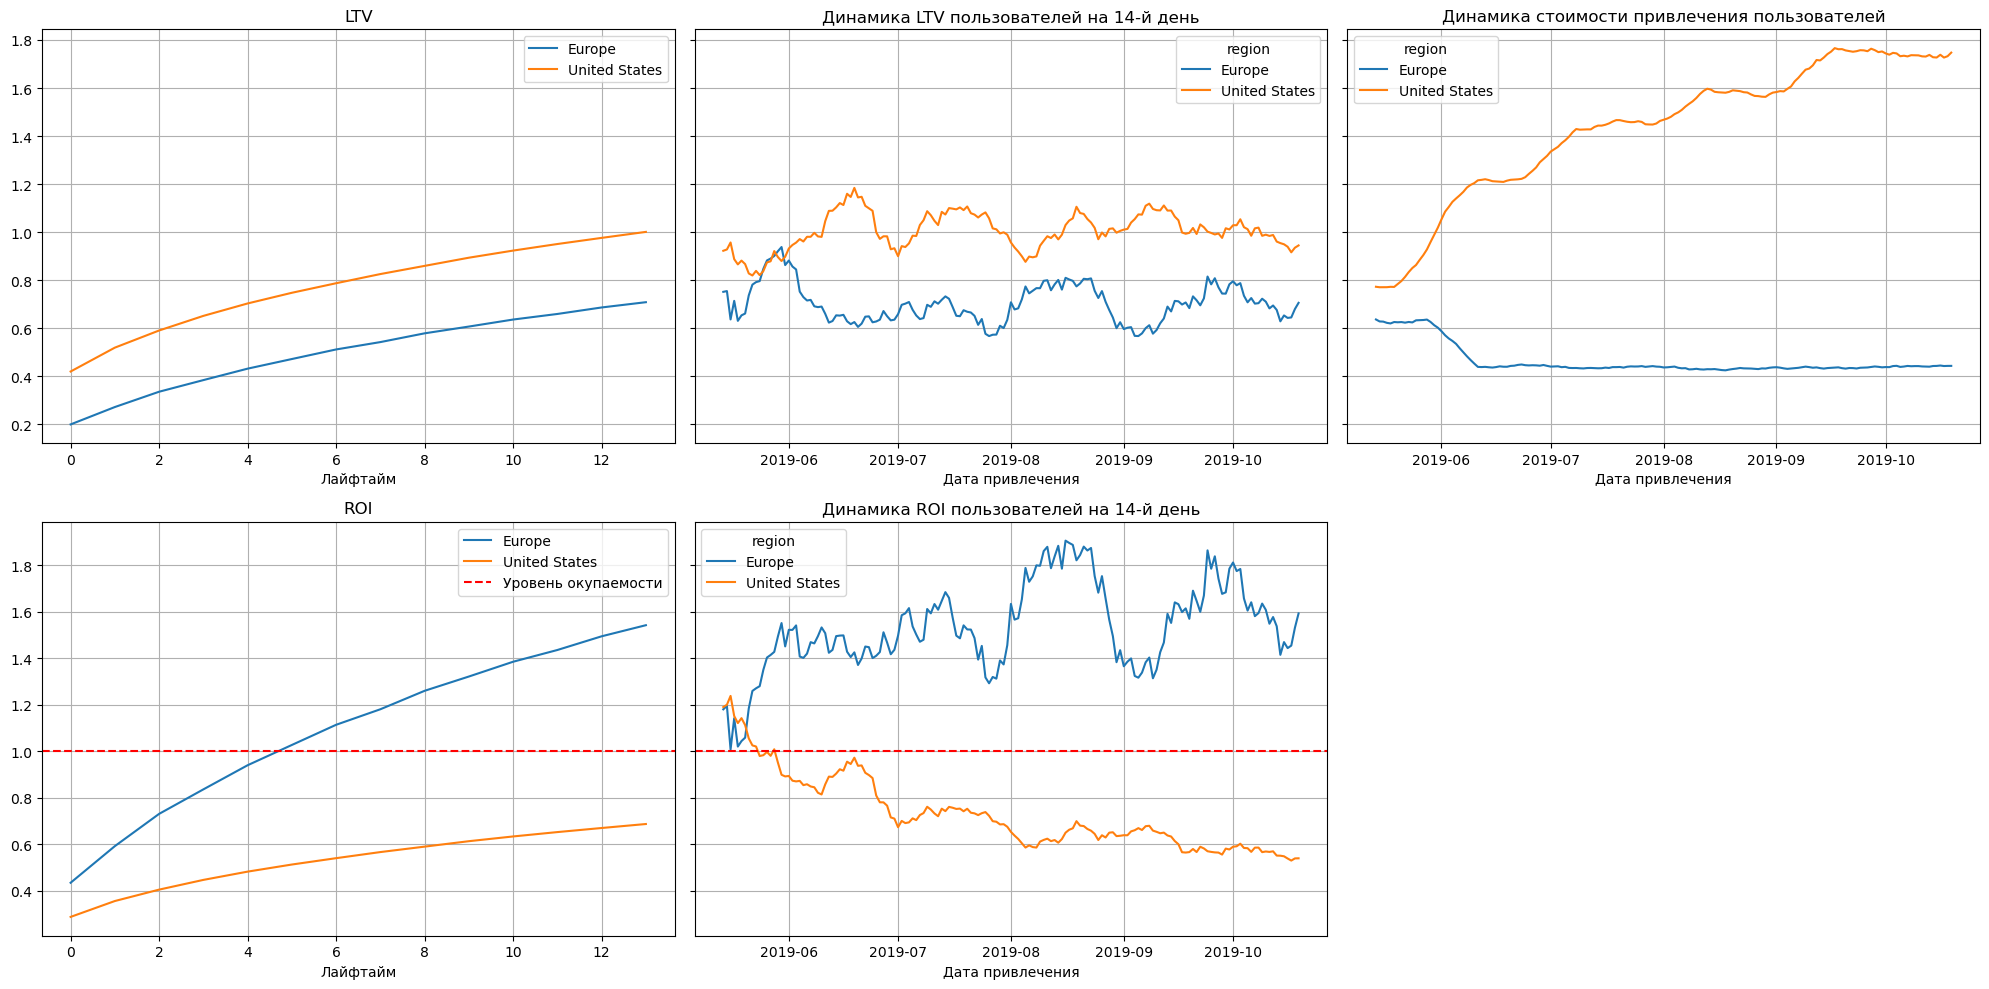

In [51]:
#построение графиков в разрезе США-Европа
profiles_modified = profiles
profiles_modified['region'] = profiles_modified['region'].replace(['France', 'Germany', 'UK'], 'Europe')

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_modified, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вывод: реклама для пользователей из Европы окупается уже на 5ый день. Для США реклама окупалась только для пользователей, привлечённых в середине мая. Затем после увеличения затрат на рекламу, она перестала окупаться.

# Общий вывод

В данной работе были изучены исторические данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года

В процессе предобработки данных были переименованы названя столбцов, изменён тип данных в некоторых столбцах. Была выполнена проверка на наличие явных и неявных дубликатов.

В процессе исследовательского анализа данных была изучено распределение пользователей в зависимости от региона, используемого устройства и рекламного канала, с которого пришли пользователи. Было выяснено, что наибольшее количество пользователей (платящих и неплатящих) приходится на США. Среди устройств наибольшее количество пользователей использует iPhone. Что касается рекламного канала, максимальное количество пользователей пришло из органического трафика.

За исследуемый период на рекламу было потрачено 105497, из них наибольшее количество денег было потрачено на 2 рекламных канала (TipTop и FaceBoom). Лидером по стоимости привлечения клиента является TipTop.

Основной причиной убыточности рекламной кампании является тот факт, что на рекламные каналы FaceBoom и TipTop тратится наибольшее количество денег. При этом, эти каналы имеют ROI ниже порога окупаемости.

**Рекомендации:**
1. Необходимо перераспределить затраты на рекламные каналы. Обратить внимание на наиболее успешные рекламные каналы, такие как YRabbit, MediaTornado, lamdaMediaAds. Средства можно взять из убыточных кампаний, таких как TipTop, FaceBoom и AdNonSense
2. Наиболее прибыльными являются пользователи из Великобритании, пользуюхщиеся PC. Имеет смысл сфокусироваться на инвестировании в таких клиентов. 
3. Необходимо выяснить, какие методы были использованы для привлечения клиентов из канала YRabbit в июле, так как этот период характеризуется ростом ROI.
4. Для улучшения конверсии и удержания, необходимо более детально изучить проблему низкого удержания платящих клиентов, пришедших из рекламных каналов FaceBoom и AdNonSense